# Facial Expression Recognition
Muhammad Arief - 152236035100-766


# 1 Data Analysis (DA)

## 1.1. Data Info

In [1]:
from pathlib import Path
from PIL import Image

In [2]:
ROOT_DATA_TRAIN = 'FERdata/train'
data_path_train = Path(ROOT_DATA_TRAIN)
import random

# get Class Name
class_names = [d.name for d in data_path_train.iterdir()]

# get number class
num_class = len(class_names)

# get all image_file
image_files = list(data_path_train.rglob('*.jpg'))

# for i in range(len(image_files)):
#  im = Image.open(image_files[i])
#  resz = im.resize((48,48))
#  resz.save(image_files[i])

# get all image perclass
dict_file = {}
for c in class_names:
    dict_file[c] = list(data_path_train.rglob('{}/*.jpg'.format(c)))

# get image width and height
image_width, image_height = Image.open(image_files[5]).size

# print all
print(f'There are {len(image_files)} training images in {len(class_names)} distinct categories')
print(f'Image Dimensions : {image_width} x {image_height}')
print('Total image perclass:')
for c in class_names:
    print("Label {0:9} : {1}".format(c,len(dict_file[c])))

There are 28709 training images in 7 distinct categories
Image Dimensions : 48 x 48
Total image perclass:
Label sad       : 4830
Label surprise  : 3171
Label neutral   : 4965
Label fear      : 4097
Label happy     : 7215
Label disgust   : 436
Label angry     : 3995


In [3]:
print(len(image_files))

28709


In [4]:
# ii = Image.open(image_files[0])
# print()

In [5]:
ROOT_DATA_VALIDATION = 'FERdata/validation'
data_path_validation = Path(ROOT_DATA_VALIDATION)
import random

# get Class Name
class_names_validation = [d.name for d in data_path_validation.iterdir()]

# get number class
num_class_validation = len(class_names_validation)

# get all image_file
image_files_validation = list(data_path_validation.rglob('*.jpg'))

for i in range(len(image_files_validation)):
  im_validation = Image.open(image_files_validation[i])
  resz_validation = im_validation.resize((48,48))
  resz_validation.save(image_files_validation[i])

# get all image perclass
dict_file_validation = {}
for cval in class_names_validation:
    dict_file_validation[cval] = list(data_path_validation.rglob('{}/*.jpg'.format(cval)))

# get image width and height
image_width_validation, image_height_validation = Image.open(image_files_validation[5]).size

# print all
print(f'There are {len(image_files_validation)} validation images in {len(class_names_validation)} distinct categories')
print(f'Image Dimensions : {image_width_validation} x {image_height_validation}')
print('Total image perclass:')
for cval in class_names_validation:
    print("Label {0:9} : {1}".format(cval,len(dict_file_validation[cval])))

There are 7178 validation images in 7 distinct categories
Image Dimensions : 48 x 48
Total image perclass:
Label sad       : 1247
Label surprise  : 831
Label neutral   : 1233
Label fear      : 1024
Label happy     : 1774
Label disgust   : 111
Label angry     : 958


In [6]:
print(len(image_files_validation))

7178


## 1.2. Check Sample Image

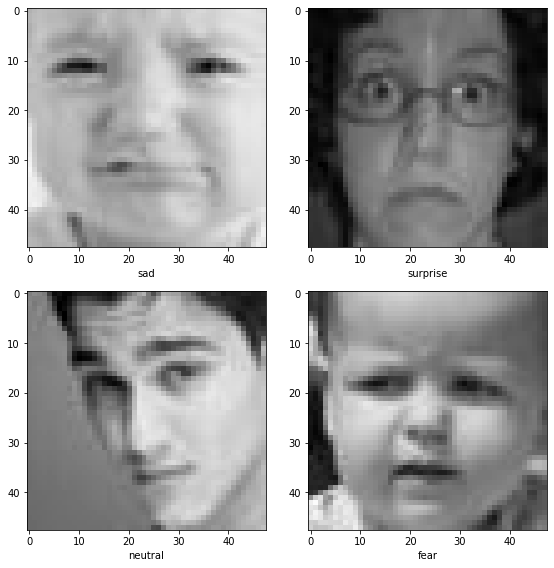

In [7]:
import numpy as np_train

%matplotlib inline
import matplotlib.pyplot as mp_train

np_train.random.seed(551)

mp_train.subplots(2,2,figsize=(8,8))
for i, c in enumerate(class_names):
    if i == 4:
                break
    else:
        im = Image.open(dict_file[c][random.randint(0, len(dict_file[c]))])
        arr = np_train.array(im)
        mp_train.subplot(2,2,i+1)
        mp_train.xlabel(c)
        mp_train.imshow(arr,cmap='gray',vmin=0,vmax=255)
mp_train.tight_layout()
mp_train.show()

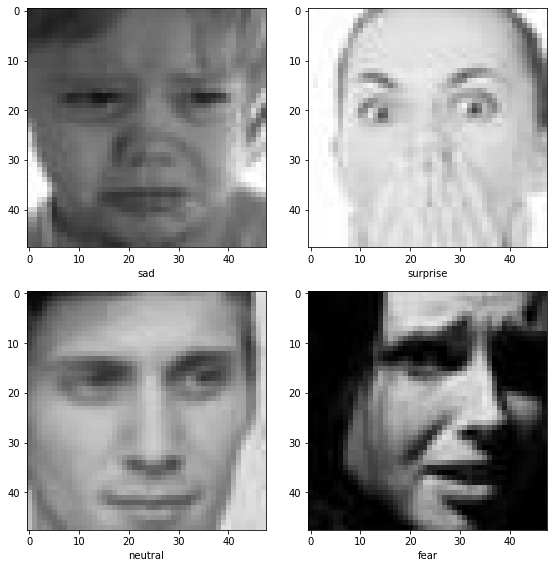

In [8]:
import numpy as np_validation

%matplotlib inline
import matplotlib.pyplot as mp_validation

np_validation.random.seed(551)

mp_validation.subplots(2,2,figsize=(8,8))
for i_val, c_val in enumerate(class_names_validation):
    if i_val == 4:
                break
    else:
        im_validation = Image.open(dict_file_validation[c_val][random.randint(0, len(dict_file_validation[c_val]))])
        arr_validation = np_validation.array(im_validation)
        mp_validation.subplot(2,2,i_val+1)
        mp_validation.xlabel(c_val)
        mp_validation.imshow(arr_validation,cmap='gray',vmin=0,vmax=255)
mp_validation.tight_layout()
mp_validation.show()


# 2 Data Preparation

## 2.1. Convert to dataframe

In [9]:
import pandas as pd_train

# Convert data to list
list_data_train = []
for k, v in dict_file.items():
    for f in v:
        _dict = {'filename': f, 'class_name': k}
        list_data_train.append(_dict)

# To pandas dataframe
df_train = pd_train.DataFrame(list_data_train)

In [10]:
df_train.sample(7)

,filename,class_name
26197,FERdata/train/angry/Training_40219937.jpg,angry
5693,FERdata/train/surprise/Training_59938779.jpg,surprise
19811,FERdata/train/happy/Training_11977629.jpg,happy
1227,FERdata/train/sad/Training_27470164.jpg,sad
18907,FERdata/train/happy/Training_76330499.jpg,happy
24810,FERdata/train/angry/Training_35906641.jpg,angry
12719,FERdata/train/neutral/Training_56098186.jpg,neutral


In [11]:
import pandas as pd_validation

# Convert data to list
list_data_validation = []
for k, v in dict_file_validation.items():
    for f in v:
        _dict = {'filename': f, 'class_name': k}
        list_data_validation.append(_dict)

# To pandas dataframe
df_validation = pd_validation.DataFrame(list_data_validation)

In [12]:
df_validation.sample(7)

,filename,class_name
1073,FERdata/validation/sad/PublicTest_54738171.jpg,sad
5476,FERdata/validation/happy/PrivateTest_87485263.jpg,happy
3475,FERdata/validation/fear/PrivateTest_25595121.jpg,fear
841,FERdata/validation/sad/PrivateTest_24655069.jpg,sad
6569,FERdata/validation/angry/PrivateTest_46067064.jpg,angry
5892,FERdata/validation/happy/PublicTest_17904919.jpg,happy
4869,FERdata/validation/happy/PublicTest_50055950.jpg,happy


## 2.2 Check Class Balance

In [13]:
df_train.groupby('class_name').size()

class_name
angry       3995
disgust      436
fear        4097
happy       7215
neutral     4965
sad         4830
surprise    3171
dtype: int64

In [14]:
df_validation.groupby('class_name').size()

class_name
angry        958
disgust      111
fear        1024
happy       1774
neutral     1233
sad         1247
surprise     831
dtype: int64

## 2.3. Check mean, std, min and max from data training and validation

In [15]:
from tqdm import tqdm
from torchvision import transforms


In [16]:
mean_list_train = []
std_list_train = []
max_list_train = []
min_list_train = []
toTensor = transforms.ToTensor()  # Convert from 0-255 to 0-1
for i, row in tqdm(df_train.iterrows(), total=len(df_train)):
    _im = Image.open(row['filename'])
    _im = toTensor(_im)
    mean_list_train.append(_im.mean())
    std_list_train.append(_im.std())
    max_list_train.append(_im.max())
    min_list_train.append(_im.min())

100%|██████████| 28709/28709 [00:13<00:00, 2140.58it/s]


In [17]:
avg_mean_train = np_train.array(mean_list_train).mean()
avg_std_train = np_train.array(std_list_train).mean()
min_data_train = np_train.array(min_list_train).min()
max_data_train = np_train.array(max_list_train).max()
print(f'mean train: {avg_mean_train}, std train: {avg_std_train}, min train: {min_data_train}, max train: {max_data_train}')

mean train: 0.507707417011261, std train: 0.20897603034973145, min train: 0.0, max train: 1.0


In [18]:
mean_list_validation = []
std_list_validation = []
max_list_validation = []
min_list_validation = []
toTensor = transforms.ToTensor()  # Convert from 0-255 to 0-1
for i, row in tqdm(df_validation.iterrows(), total=len(df_validation)):
    _im = Image.open(row['filename'])
    _im = toTensor(_im)
    mean_list_validation.append(_im.mean())
    std_list_validation.append(_im.std())
    max_list_validation.append(_im.max())
    min_list_validation.append(_im.min())

100%|██████████| 7178/7178 [00:03<00:00, 2120.84it/s]


In [19]:
avg_mean_validation = np_validation.array(mean_list_validation).mean()
avg_std_validation = np_validation.array(std_list_validation).mean()
min_data_validation = np_validation.array(min_list_validation).min()
max_data_validation = np_validation.array(max_list_validation).max()
print(f'mean validation: {avg_mean_validation}, std validation: {avg_std_validation}, min validation: {min_data_validation}, max validation: {max_data_validation}')

mean validation: 0.5059783458709717, std validation: 0.20949514210224152, min validation: 0.0, max validation: 1.0


# MODEL BARU
https://www.kaggle.com/code/shawon10/facial-expression-detection-cnn

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(ROOT_DATA_TRAIN,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(ROOT_DATA_VALIDATION,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
import tensorflow as tf
import keras.models
from keras import regularizers
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [22]:
def DemoDayModel(input_size, classes=7):
    
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(classes))
    model.add(Activation('softmax'))


    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [23]:
DemoDay = DemoDayModel((48,48,1), 7)
DemoDay.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

# Checkpoint

In [24]:
import datetime
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau


In [25]:
chk_path = 'DemoDay.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [26]:
sp_epoch = 897
val_steps = 224

hist = DemoDay.fit(x=training_set,
                  validation_data=validation_set,
                  epochs=100,
                  batch_size=32,
                  verbose=1,
                  steps_per_epoch=sp_epoch,
                  validation_steps=val_steps,
                  shuffle=True,
                  callbacks=callbacks)

Epoch 1/100
897/897 [==============================] - ETA: 0s - loss: 1.8680 - accuracy: 0.2445
Epoch 1: val_loss improved from inf to 1.77657, saving model to DemoDay.h5
897/897 [==============================] - 24s 21ms/step - loss: 1.8680 - accuracy: 0.2445 - val_loss: 1.7766 - val_accuracy: 0.2648 - lr: 0.0010
Epoch 2/100
897/897 [==============================] - ETA: 0s - loss: 1.7157 - accuracy: 0.3149
Epoch 2: val_loss improved from 1.77657 to 1.60021, saving model to DemoDay.h5
897/897 [==============================] - 18s 20ms/step - loss: 1.7157 - accuracy: 0.3149 - val_loss: 1.6002 - val_accuracy: 0.3746 - lr: 0.0010
Epoch 3/100
894/897 [============================>.] - ETA: 0s - loss: 1.5999 - accuracy: 0.3740
Epoch 3: val_loss did not improve from 1.60021
897/897 [==============================] - 18s 20ms/step - loss: 1.5999 - accuracy: 0.3739 - val_loss: 1.8303 - val_accuracy: 0.3149 - lr: 0.0010
Epoch 4/100
895/897 [============================>.] - ETA: 0s - loss:

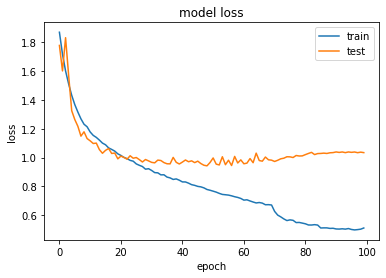

In [27]:
# https://www.kaggle.com/code/infinator/mood-detection-and-song-recommendation

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

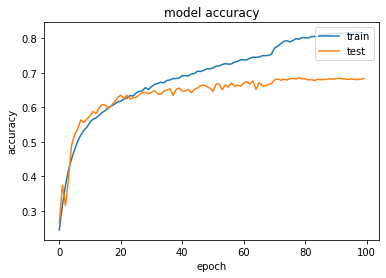

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [29]:
train_loss, train_accu = DemoDay.evaluate(training_set)
validaton_loss, validation_accu = DemoDay.evaluate(validation_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, validation_accu*100))

225/225 [==============================] - 3s 11ms/step - loss: 1.0348 - accuracy: 0.6835
final train accuracy = 89.55 , validation accuracy = 68.35
